In [1]:
# Librerías
# ======================================================================================
import networkx as nx
import pandas as pd
import numpy as np
import networkx.algorithms.community as nx_comm
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import itertools
import matplotlib.cm as cm

In [43]:
# Datos
# ======================================================================================
#### > Agregar código

In [44]:
# Creación de la red
# ======================================================================================
G = nx.from_pandas_edgelist(df = network,
                            source = 'from',
                            target = 'to',
                            edge_attr = ['weight'])

### **Detección de comunidades**

Existen dos tipos principales de técnicas de detección de comunidades, aglomerativas y divisorias.

Los métodos aglomerativos generalmente comienzan con una red que contiene solo los nodos de la red original. Las conexiones (enlaces) se agregan una por una, dándole prioridad a las más fuertes sobre las más débiles. La fuerza de las conexiones, o peso, se calcula de manera diferente según la implementación específica del algoritmo.

Por otro lado, los métodos divisorios se basan en el proceso de eliminar enlaces de la red original de forma iterativa. Los enlaces más fuertes se eliminan antes que los más débiles. En cada paso, se repite el cálculo del peso del enlace, ya que el peso de los enlaces restantes cambia después de cada eliminación. Después de un cierto número de pasos, se obtienen agrupaciones de nodos densamente conectados, también conocidas como comunidades.

Dos de los algoritmos más empleados para encontrar comunidades son el algoritmo Girvan-Newman y el algoritmo de Louvain.

### **Algoritmo de Girvan-Newman**

El algoritmo de Girvan-Newman se basa en la eliminación iterativa de los enlaces por los que pasa el mayor número de caminos más cortos de la red (mayor métrica de betweenness). Al eliminar enlaces uno a uno, la red se descompone en trozos más pequeños, las llamadas comunidades. El algoritmo Girvan-Newman puede dividirse en cuatro pasos principales:

1. Calcular la centralidad (betweenness) de cada enlace de la red.

2. Eliminar el enlace con mayor centralidad. Si todos son iguales, se elige aleatoriamente.

3. Calcular de nuevo la centralidad de los enlaces restantes.

4. Repetir los pasos 2-4 hasta que no queden enlaces.

El algoritmo de Girvan-Newman está disponible en la función girvan_newman() de la librería networkx. Esta función tiene 2 argumentos:

- **G**: un grafo de networkx.

- **most_valuable_edge**: una función que recibe como input un grafo y devuelve un enlace. El enlace devuelto es eliminado de la red en cada iteración del algoritmo. Por defecto, se utiliza el enlace con mayor networkx.edge_betweenness_centrality().

El resultado devuelto por la función es un generador. En cada iteración se obtiene una tupla de sets, donde cada set contiene los nodos que forman cada comunidad.

In [4]:
# Algoritmo Girvan-Newman
# ======================================================================================
communities_generator = nx_comm.girvan_newman(G, most_valuable_edge=None)

In [5]:
# Comunidades tras la primera iteración del algoritmo
# ======================================================================================
communities = next(communities_generator)
communities

({1, 2, 4, 5, 6, 7, 8, 11, 12, 13, 14, 17, 18, 20, 22},
 {3, 9, 10, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34})

Se pueden obtener los resultados de las n primeras iteraciones del algoritmo utilizando _itertools.islice_.

In [6]:
# Comunidades tras las n-1 primeras iteraciones del algoritmo
# ======================================================================================
communities_generator = nx_comm.girvan_newman(G, most_valuable_edge=None)
for communities in itertools.islice(communities_generator, 8):
    print(communities)

({1, 2, 4, 5, 6, 7, 8, 11, 12, 13, 14, 17, 18, 20, 22}, {3, 9, 10, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34})
({1, 2, 4, 5, 6, 7, 8, 11, 12, 13, 14, 17, 18, 20, 22}, {32, 33, 34, 3, 9, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {10})
({1, 2, 4, 8, 12, 13, 14, 18, 20, 22}, {32, 33, 34, 3, 9, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {5, 6, 7, 11, 17}, {10})
({1, 2, 4, 8, 12, 13, 14, 18, 20, 22}, {32, 3, 25, 26, 28, 29}, {5, 6, 7, 11, 17}, {33, 34, 9, 15, 16, 19, 21, 23, 24, 27, 30, 31}, {10})
({1, 2, 4, 8, 13, 14, 18, 20, 22}, {32, 3, 25, 26, 28, 29}, {5, 6, 7, 11, 17}, {33, 34, 9, 15, 16, 19, 21, 23, 24, 27, 30, 31}, {12}, {10})
({1, 2, 4, 8, 13, 14, 18, 20, 22}, {32, 3, 25, 26, 28, 29}, {5, 6, 7, 11, 17}, {33, 34, 9, 15, 16, 19, 21, 23, 24, 30, 31}, {12}, {10}, {27})
({1, 2, 4, 8, 14, 18, 20, 22}, {32, 3, 25, 26, 28, 29}, {5, 6, 7, 11, 17}, {33, 34, 9, 15, 16, 19, 21, 23, 24, 30, 31}, {12}, {13}, {10}, {27})
({1, 2, 4, 8, 14, 18, 20, 22}, {32

In [7]:
# Acceder a las comunidades generadas en una determinada iteración
# ======================================================================================
iteracion = 5
communities_generator = nx_comm.girvan_newman(G, most_valuable_edge=None)
communities = next(itertools.islice(communities_generator, iteracion, None))
communities

({1, 2, 4, 8, 13, 14, 18, 20, 22},
 {3, 25, 26, 28, 29, 32},
 {5, 6, 7, 11, 17},
 {9, 15, 16, 19, 21, 23, 24, 30, 31, 33, 34},
 {12},
 {10},
 {27})

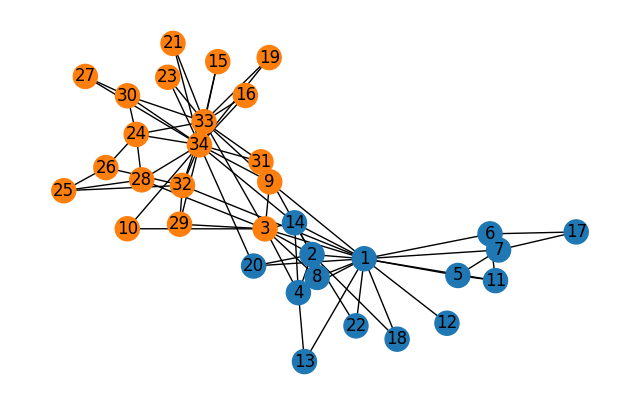

In [8]:
# Gráfico de la red coloreado por comunidades tras 1 iteraciones del algoritmo
# ======================================================================================
communities_generator = nx_comm.girvan_newman(G, most_valuable_edge=None)
communities = next(itertools.islice(communities_generator, 0, None)) ## > en esta parte suceden las iteraciones

color_pallet = list(mcolors.TABLEAU_COLORS.values())
node_colors = []
for node in G:
    if node in communities[0]:
        node_colors.append(color_pallet[0])
    elif node in communities[1]:
        node_colors.append(color_pallet[1])
    else:
        node_colors.append(color_pallet[2])

fig, ax = plt.subplots(figsize=(8, 5))
nx.draw(G, node_color=node_colors, with_labels=True, ax=ax)
plt.show()

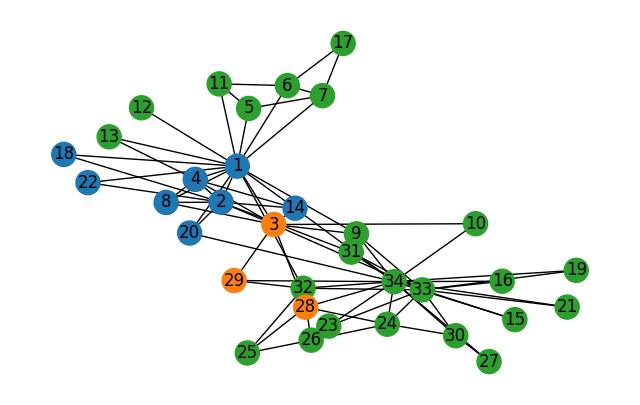

In [9]:
# Gráfico de la red coloreado por comunidades tras 1 [0] iteraciones del algoritmo
# ======================================================================================
communities_generator = nx_comm.girvan_newman(G, most_valuable_edge=None)
communities = next(itertools.islice(communities_generator, 8, None))

color_pallet = list(mcolors.TABLEAU_COLORS.values())
node_colors = []
for node in G:
    if node in communities[0]:
        node_colors.append(color_pallet[0])
    elif node in communities[1]:
        node_colors.append(color_pallet[1])
    else:
        node_colors.append(color_pallet[2])

fig, ax = plt.subplots(figsize=(8, 5))
nx.draw(G, node_color=node_colors, with_labels=True, ax=ax)
plt.show()

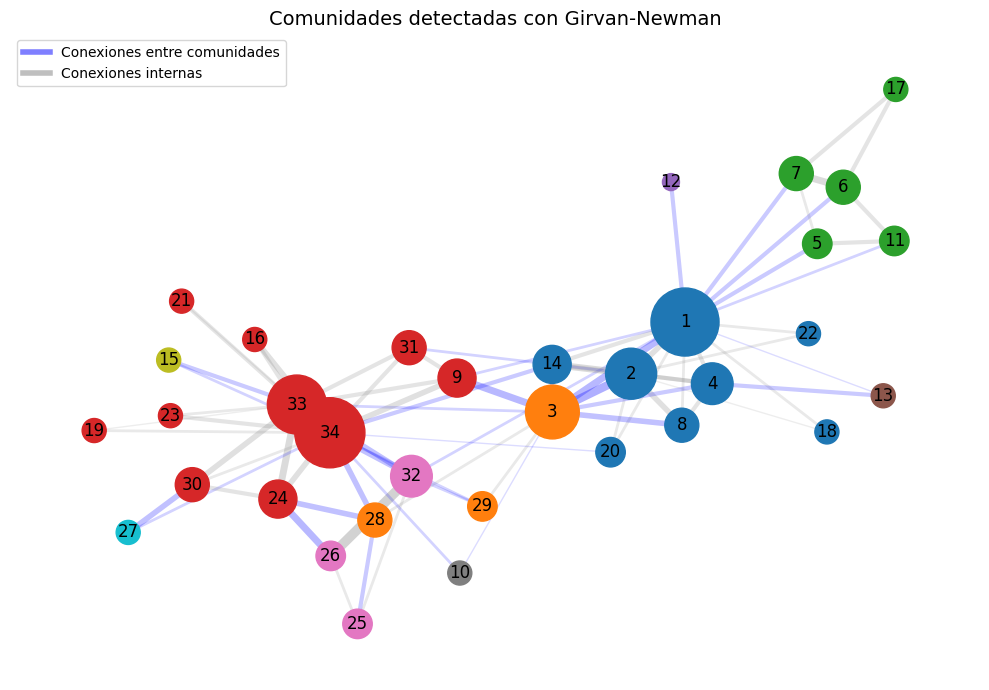

In [10]:
# Mejorando la estetica de la grafica n = 8
# ======================================================================================
communities_generator = nx_comm.girvan_newman(G)
communities = next(itertools.islice(communities_generator, 8, None))

# Asignar comunidad a cada nodo
comunidad_por_nodo = {}
for i, comunidad in enumerate(communities):
    for nodo in comunidad:
        comunidad_por_nodo[nodo] = i

# Paleta de colores
color_pallet = list(mcolors.TABLEAU_COLORS.values())

# Posición de los nodos
pos = nx.spring_layout(G)

# Estética de los nodos
nodes_size = [150 * G.degree[node] for node in G.nodes()]
nodes_color = [color_pallet[comunidad_por_nodo[node] % len(color_pallet)] for node in G.nodes()]

# Estética de los enlaces
edges_width = list(nx.get_edge_attributes(G, 'weight').values())
edges_alpha = 0.1 + np.array(edges_width)/np.linalg.norm(np.array(edges_width), ord=2)

# Colorear enlaces: azul si conectan nodos de diferentes comunidades, gris si es dentro de la misma
edge_colors = []
for u, v in G.edges():
    if comunidad_por_nodo[u] != comunidad_por_nodo[v]:
        edge_colors.append('blue')
    else:
        edge_colors.append('grey')

# Leyenda
custom_lines = [Line2D([0], [0], color='blue', alpha=0.5, lw=4),
                Line2D([0], [0], color='grey', alpha=0.5, lw=4)]
legend_labels = ['Conexiones entre comunidades', 'Conexiones internas']

# Graficar
fig, ax = plt.subplots(figsize=(10, 7))
nx.draw_networkx_nodes(G, pos=pos, node_size=nodes_size, node_color=nodes_color, ax=ax)
nx.draw_networkx_labels(G, pos=pos, ax=ax)
nx.draw_networkx_edges(G, pos=pos, edgelist=G.edges, width=edges_width,
                       edge_color=edge_colors, alpha=edges_alpha, ax=ax)

ax.legend(custom_lines, legend_labels)
plt.title("Comunidades detectadas con Girvan-Newman", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


### **Louvain Algorithm**

El algoritmo de Louvain es uno de los algoritmos más populares y eficientes para detectar comunidades en grafos. Se basa en la idea de maximizar el número de enlaces dentro de una comunidad y minimizar el número de enlaces entre comunidades (optimización de modularidad). Su funcionamiento se divide en dos fases: una fase de agrupamiento y una fase de refinamiento.

1. **Fase de agrupamiento**

En la fase de agrupamiento, cada nodo se asigna a su propia comunidad. Luego, se itera sobre cada nodo del grafo y se calcula la ganancia en modularidad que se obtendría al mover el nodo a una comunidad diferente. Si se obtiene una ganancia positiva, se mueve el nodo a la comunidad correspondiente. Esto se repite hasta que ya no se pueden obtener ganancias adicionales.

2. **Fase de refinamiento**

La segunda fase consiste en construir una nueva red cuyos nodos son las comunidades encontradas en la primera fase. Los pesos de los enlaces entre los nuevos nodos se calculan sumando del peso de los enlaces entre los nodos de las dos comunidades correspondientes. Al final de esta fase, se obtiene una partición del grafo con comunidades más compactas y mejor definidas que las obtenidas en la fase de agrupamiento.

_Las dos fases anteriores se ejecutan hasta que no se obtiene ninguna ganancia de modularidad (o es inferior a un umbral). El resultado final es una partición del grafo en comunidades_.

In [11]:
# Louvain Algorithm
# ======================================================================================
communities = nx_comm.louvain_communities(G, weight='weight ', resolution=0.5)
communities

[{1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 17, 18, 20, 22},
 {9, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34}]

In [12]:
communities_map = {}
for i in range(len(communities)):
    communities_map.update(dict.fromkeys(communities[i], i))

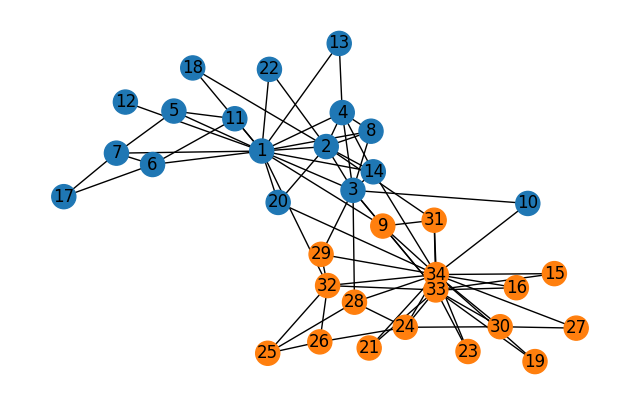

In [13]:
# Gráfico de la red coloreado por comunidades
# ======================================================================================
color_pallet = list(mcolors.TABLEAU_COLORS.values())
node_colors = []
for node in G:
    node_colors.append(color_pallet[communities_map[node]])

fig, ax = plt.subplots(figsize=(8, 5))
nx.draw(G, node_color=node_colors, with_labels=True)
plt.show()

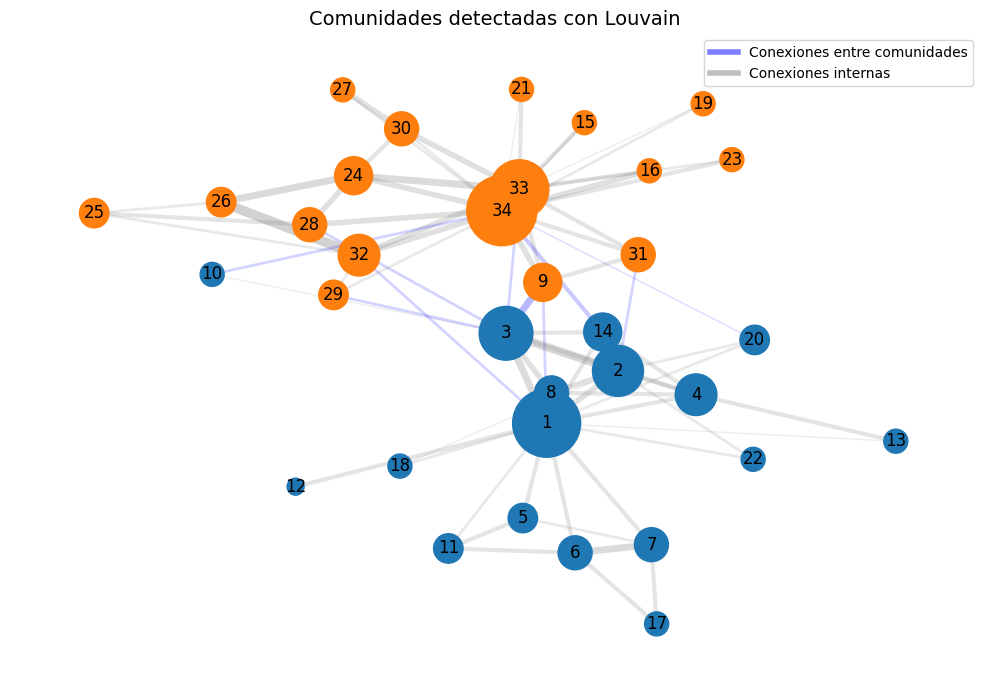

In [14]:
# Mejorando la estetica de la grafica
# ======================================================================================
# Paleta de colores para comunidades
color_pallet = list(mcolors.TABLEAU_COLORS.values())

# Posiciones fijas
pos = nx.spring_layout(G)

# Estética de nodos
nodes_size = [150 * G.degree[node] for node in G.nodes()]
nodes_color = [color_pallet[communities_map[node] % len(color_pallet)] for node in G.nodes()]

# Estética de enlaces
edges_width = list(nx.get_edge_attributes(G, 'weight').values())
edges_alpha = 0.1 + np.array(edges_width)/np.linalg.norm(np.array(edges_width), ord=2)

edge_colors = []
for u, v in G.edges():
    if communities_map[u] != communities_map[v]:
        edge_colors.append('blue')
    else:
        edge_colors.append('grey')

# Leyenda
custom_lines = [Line2D([0], [0], color='blue', alpha=0.5, lw=4),
                Line2D([0], [0], color='grey', alpha=0.5, lw=4)]
legend_labels = ['Conexiones entre comunidades', 'Conexiones internas']

# Graficar
fig, ax = plt.subplots(figsize=(10, 7))
nx.draw_networkx_nodes(G, pos=pos, node_size=nodes_size, node_color=nodes_color, ax=ax)
nx.draw_networkx_labels(G, pos=pos, ax=ax)
nx.draw_networkx_edges(G, pos=pos, edgelist=G.edges, width=edges_width,
                       edge_color=edge_colors, alpha=edges_alpha, ax=ax)

ax.legend(custom_lines, legend_labels)
plt.title("Comunidades detectadas con Louvain", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

### **Camino más corto (shortest path)**

En teoría de grafos, el camino más corto de un grafo es el camino entre dos nodos que tiene la suma mínima de pesos de sus conexiones (aristas). Los pesos de las aristas pueden representar diversos factores, como la distancia, el coste o el tiempo.

Para encontrar el camino más corto en un grafo, se pueden utilizar varios algoritmos, entre los que se incluyen:

1. **Algoritmo de Dijkstra**: Este algoritmo funciona para grafos con pesos de arista no negativos y encuentra el camino más corto desde un nodo origen a todos los demás nodos del grafo. shortest_path(G, smethod='dijkstra')

2. **Algoritmo de Bellman-Ford**: A diferencia del algoritmo de Dijkstra, este algoritmo puede trabajar con grafos con pesos de arista negativos. Encuentra el camino más corto desde un nodo origen a todos los demás nodos del grafo. shortest_path(G, smethod='bellman-ford')

3. **Algoritmo A (A-star)**: Este algoritmo utiliza una función heurística además de los pesos de las aristas para guiar la búsqueda del camino más corto. Se suele utilizar en problemas de búsqueda de caminos, como en los sistemas de navegación GPS.

4. **Algoritmo Floyd**: El algoritmo de Floyd es apropiado para encontrar los caminos más cortos en grafos densos o grafos con pesos negativos cuando falla el algoritmo de Dijkstra. Este algoritmo también puede fallar si hay ciclos negativos. floyd_warshall(G, weight='weight')

5. **Algoritmo Johnson**: El algoritmo de Johnson es adecuado incluso para grafos con pesos negativos. Funciona utilizando el algoritmo de Bellman-Ford para calcular una transformación del grafo de entrada que elimina todos los pesos negativos, lo que permite utilizar el algoritmo de Dijkstra en el grafo transformado. Se trata por lo tanto de una combinacioón de los los algoritmos de Dijkstra y Bellman-Ford. johnson(G, weight='weight').

In [15]:
# Camino más corto entre los nodos 21 y 17
# ======================================================================================
shortest_path = nx.shortest_path(G, source=21, target=17, method='dijkstra')
shortest_path

[21, 33, 3, 1, 6, 17]

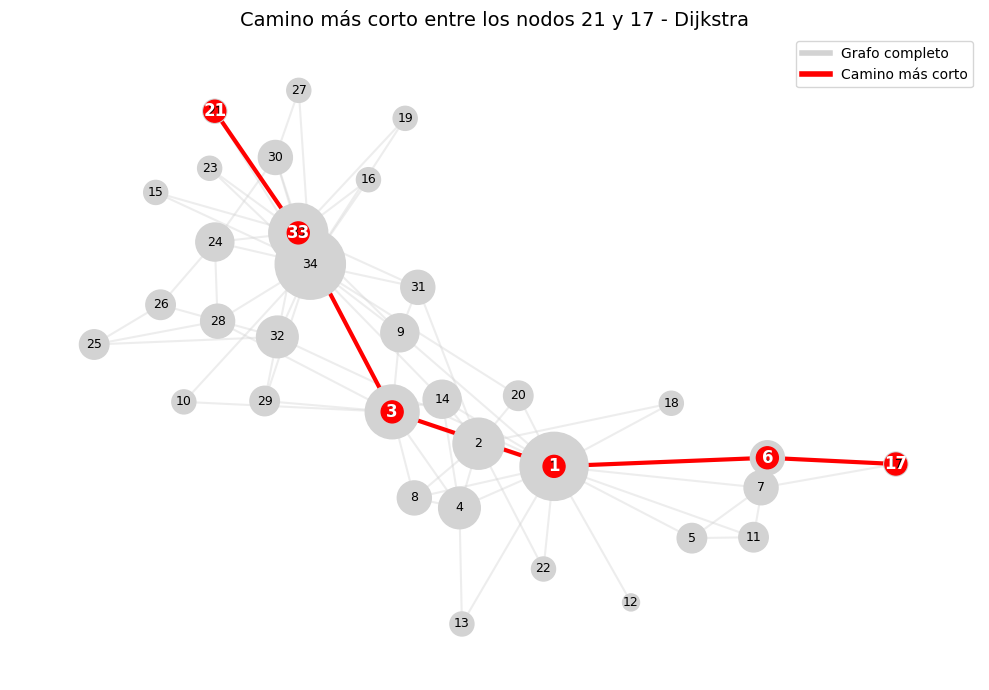

In [26]:
# Resaltar el camino más corto en el grafo
# ======================================================================================
fig, ax = plt.subplots(figsize=(10, 7))

# Posición fija de los nodos
pos = nx.spring_layout(G, seed=42)

# Estética de los nodos
nodes_size = [150 * G.degree[node] for node in G.nodes()]
nodes_color = ['lightgrey' for _ in G.nodes()]

# Estética de los enlaces
edges_width = list(nx.get_edge_attributes(G, 'weight').values())
edges_alpha = 0.1 + np.array(edges_width)/np.linalg.norm(np.array(edges_width), ord=2)

# Dibujar grafo completo en gris
nx.draw_networkx_edges(G, pos=pos, edge_color="lightgrey", width=1.5, alpha=0.4, ax=ax)
nx.draw_networkx_nodes(G, pos=pos, node_size=nodes_size, node_color=nodes_color, ax=ax)
nx.draw_networkx_labels(G, pos=pos, ax=ax, font_size=9)

# Dibujar camino más corto en rojo
sub_graph = G.subgraph(shortest_path)
nx.draw_networkx_edges(sub_graph, pos=pos, edge_color="red", width=3, ax=ax)
nx.draw_networkx_nodes(sub_graph, pos=pos, node_color="red", node_size=[250 for _ in shortest_path], ax=ax)
nx.draw_networkx_labels(sub_graph, pos=pos, labels={node: node for node in shortest_path}, font_color='white', font_weight='bold', ax=ax)

# Leyenda
custom_lines = [Line2D([0], [0], color='lightgrey', lw=4),
                Line2D([0], [0], color='red', lw=4)]
ax.legend(custom_lines, ['Grafo completo', 'Camino más corto'])

ax.set_title("Camino más corto entre los nodos 21 y 17 - Dijkstra", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()

### Multiples caminos 

In [29]:
sources_targets = [(21, 17), (10, 5), (3, 18), (27,13)]  # Ajusta según tu grafo
shortest_paths = {}

for source, target in sources_targets:
    try:
        path = nx.shortest_path(G, source=source, target=target, method='dijkstra')
        shortest_paths[(source, target)] = path
    except nx.NetworkXNoPath:
        shortest_paths[(source, target)] = None

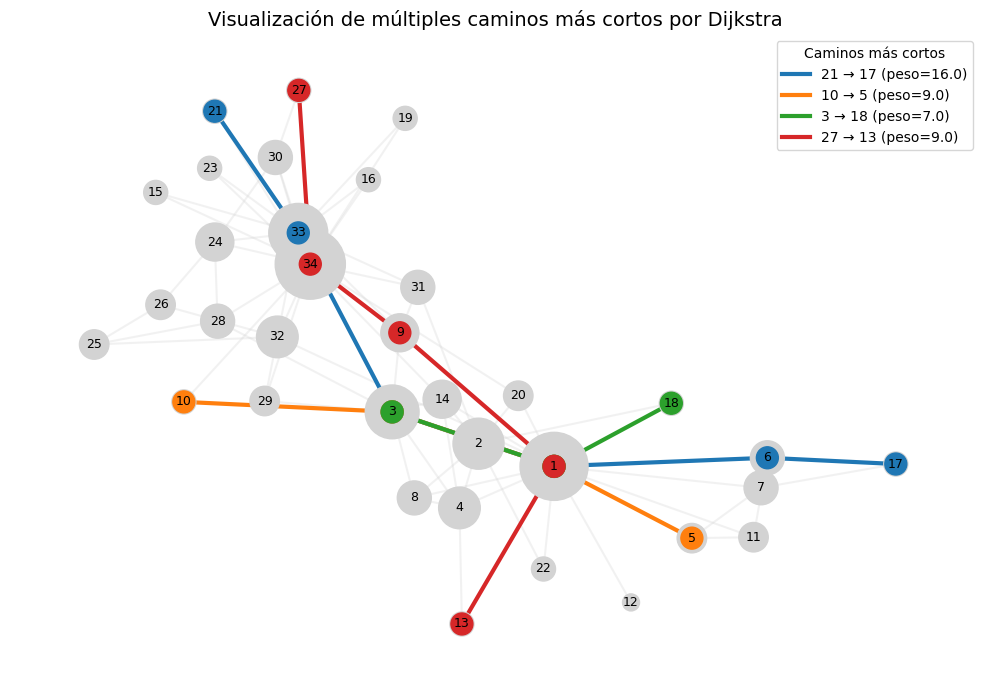

In [30]:
# Paso 2: Graficar caminos sobre el grafo
fig, ax = plt.subplots(figsize=(10, 7))

# Posiciones fijas
pos = nx.spring_layout(G, seed=42)

# Tamaños y colores base de nodos
nodes_size = [150 * G.degree[node] for node in G.nodes()]
nodes_color = ['lightgrey' for _ in G.nodes()]

# Dibujar la red base
nx.draw_networkx_nodes(G, pos=pos, node_size=nodes_size, node_color=nodes_color, ax=ax)
nx.draw_networkx_labels(G, pos=pos, ax=ax, font_size=9)
nx.draw_networkx_edges(G, pos=pos, edge_color='lightgrey', width=1.5, alpha=0.3, ax=ax)

# Paleta de colores (sin argumento extra)
color_map = plt.colormaps.get_cmap('tab10')

# Dibujar los caminos más cortos
legend_lines = []
for i, ((src, tgt), path) in enumerate(shortest_paths.items()):
    if path is None:
        continue
    path_edges = list(zip(path[:-1], path[1:]))
    color = color_map(i % 10)  # 'tab10' tiene 10 colores distintos

    # Dibujar nodos y aristas del camino
    nx.draw_networkx_edges(G, pos=pos, edgelist=path_edges, edge_color=[color], width=3, ax=ax)
    nx.draw_networkx_nodes(G, pos=pos, nodelist=path, node_color=[color]*len(path), node_size=250, ax=ax)

    # Calcular peso total del camino
    peso_total = sum(G[u][v]['weight'] for u, v in path_edges)

    # Agregar a leyenda
    legend_lines.append(Line2D([0], [0], color=color, lw=3, label=f'{src} → {tgt} (peso={peso_total:.1f})'))

# Mostrar leyenda
ax.legend(handles=legend_lines, title="Caminos más cortos")
ax.set_title("Visualización de múltiples caminos más cortos por Dijkstra", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()